<a href="https://colab.research.google.com/github/nahuelalmeira/poblacionPenal/blob/master/DiploDatos_PoblacionPenitenciariaArgentina_VyA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2019 -  Población Penitenciaria en Argentina




> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/




## Practico Análisis y Visualización de Datos

En este notebook se explicarán los métodos para la carga inicial de los datos que vamos a usar en el proyecto, se describirá la estructura general de los mismos, y veremos algunos métodos básicos de análisis.

Antes de comenzar a trabajar con CSVs, siempre es recomendable descargar el dataset en nuestra computadora y observarlo directamente con alguna herramienta de procesamiento de texto , para tener una visión rápida del tipo de datos con el cual trabajeremos, pero también para asegurarnos que estamos utilizando un archivo con el formato correcto.

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Inicialización y carga de datos

In [2]:
# Importamos las librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

#
sys.path.append('../config')
from mpl_settings_v3 import *

In [3]:
## Cargamos el CSV en un dataframe. Si es posible, lo descargamos y 
## sino, lo leemos online

data_dir = '../datasets'
data_file = os.path.join(data_dir, 'sneep_2017_diplodatos.zip')
url = 'https://github.com/camporeale/Datos/raw/master/sneep_2017_diplodatos.zip'

if not os.path.isfile(data_file):
    try:
        if not os.path.exists(data_dir):
            os.mkdir(data_dir)
        import wget
        wget.download(url, out=data_dir)
        data_raw = pd.read_csv(data_file, compression='zip', index_col=0)
    except:
        print('No se pudo descargar dataset. Leyendo online')
        data_raw = pd.read_csv(url,compression='zip',index_col=0)
else:
    data_raw = pd.read_csv(data_file, compression='zip', index_col=0)

/media/nahuel-ofi/datos/d/anaconda3/envs/diploDatos/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Información disponible

#### Información general

- Año censo
- Tipo de servicio penitenciario
- Provincia
- Establecimiento

#### Información poblacional

- Género
- Nacionalidad
- Estado civil
- Mujeres viviendo con sus niños
- Último lugar de residencia
- Última provincia de residencia
- Nivel de instrucción
- Última situación laboral
- Capacitación laboral al ingresar

#### Información judicial

- Jurisdicción
- Situación legal
- Tipo de delito
- Reincidente
- Establecimiento de procedencia

#### Actividades y otras situaciones registradas dentro de la institución

- Recibió atención médica en el último año
- Recibió visitas en el último año
- Participa en programa laboral
- Horas de trabajo remunerado
- Participa en programa educativo
- Participa en actividades deportivas
- Calificación conducta
- Participó en alteración del orden en el último año
- Tipo de infracción disciplinaria
- Sanción aplicada
- Fue lesionado
- Tentativa de suicidio

#### Condenas y progresividad de la pena

- Condenado a prisión o reclusión perpetua
- Tuvo reducción de pena
- Duración de la condena
- Tuvo salidas transitorias
- Incorporado al régimen de semi libertad
- Participa en programas de pre-libertad
- Participa en programa de prisión discontinua
- Participa en programa de semi detención
- Tiene período de progresividad

### Análisis exploratorio

In [5]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data_raw.shape[0])
print("Cantidad de columnas: ", data_raw.shape[1])

Cantidad de registros:  85283
Cantidad de columnas:  50


In [6]:
# Listamos las columnas y sus tipos de datos
data_raw.dtypes

anio_censo                                              int64
provincia_descripcion                                  object
establecimiento_descripcion                            object
edad                                                  float64
genero_descripcion                                     object
nacionalidad_descripcion                               object
estado_civil_descripcion                               object
nivel_instruccion_descripcion                          object
ultima_situacion_laboral_descripcion                   object
capacitacion_laboral_al_ingresar_descripcion           object
ultimo_lugar_residencia_descripcion                    object
ultima_provincia_residencia_descripcion                object
jurisdiccion_descripcion                               object
situacion_legal_descripcion                            object
fecha_detencion                                        object
fecha_condenado                                        object
establec

In [0]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data_raw.sample(2).transpose()

,44841,43189
anio_censo,2017,2017
provincia_descripcion,Córdoba,Buenos Aires
establecimiento_descripcion,ESTABLECIMIENTO PENITENCIARIO Nº 5 (VILLA MARIA),SPF - COMPLEJO FED. DE JÓVENES ADULTOS - UR.1 ...
edad,32,19
genero_descripcion,Masculino,Masculino
nacionalidad_descripcion,Argentina,Argentina
estado_civil_descripcion,Soltero,Soltero
nivel_instruccion_descripcion,Terciario incompleto,Primario incompleto
ultima_situacion_laboral_descripcion,Trabajador de tiempo parcial,Desocupado
capacitacion_laboral_al_ingresar_descripcion,Tiene alguna profesión,No tiene ni oficio ni profesión


In [7]:
# Distribución por genero
data_raw["genero_descripcion"].value_counts()

Masculino     81553
Femenino       3602
Transexual      128
Name: genero_descripcion, dtype: int64

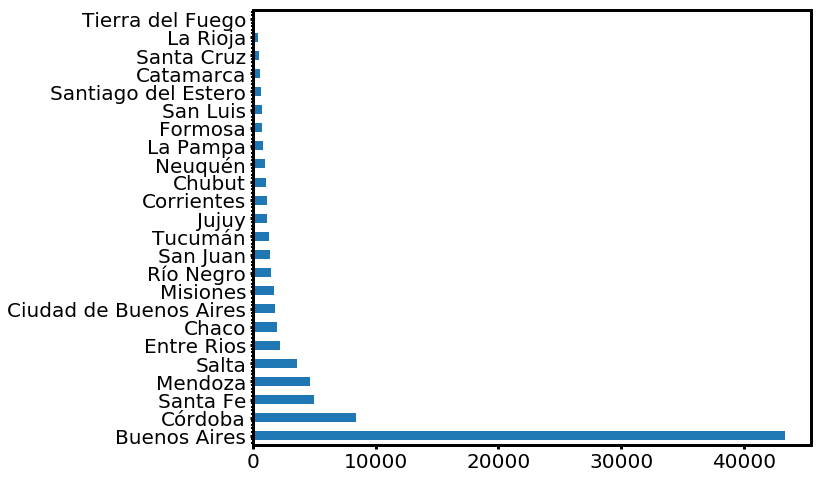

In [8]:
# Internos por provincia
plt.figure(figsize=(10, 8))
ax = plt.gca()
data_raw["provincia_descripcion"].value_counts().plot(kind='barh', ax=ax, fontsize=20)
plt.show()

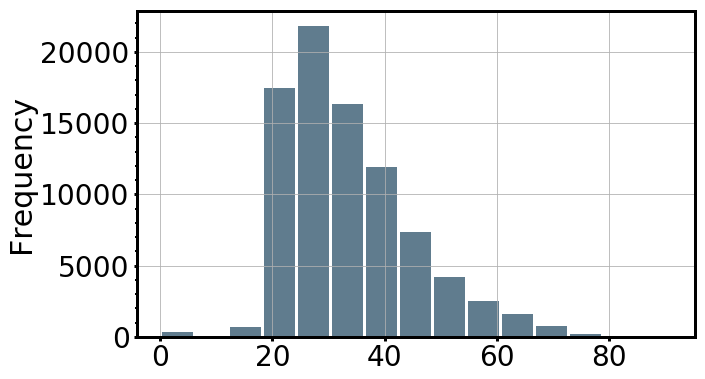

In [11]:
# Histograma por edades
data_raw["edad"].plot.hist(grid=True, bins=15, rwidth=0.9,color='#607c8e', figsize=(10,6))
plt.show()

### Análisis del Grupo

En esta sección el grupo de trabajo deberá realizar el siguiente análisis:



*   Análisis estadístico de variables


> Seleccionar un conjunto de al menos 4 variables que resulten de interés para el grupo y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)



*   Evolución de variables en el tiempo. Seleccionar 2 variables y graficar como fueron cambiando desde 2002 a 2017.  Para ello se tiene que utilizar el siguiente conjunto de datos:

https://github.com/camporeale/Datos/raw/master/sneep_2002_2017_diplodatos.zip




*   Analisis de probabilidades condicionales. Tomar al menos dos pares de variables y realizar un análisis del tipo:



> ¿Cual es la probabilidad de que el interno haya sido lesionado en el último año dado que está en una  prisión en Buenos Aires? ¿Y en Córdoba? 

> ¿Cual es la probabilidad de que se le otorguen salidas provisorias dado que esté casado/a? ¿Y siendo soltero?



Los siguientes recursos pueden usarse como ejemplos de distintos tipos de análisis:

*   http://www.saij.gob.ar/estadisticas-ejecucion-de-la-pena
*   http://www.jus.gob.ar/media/1126013/Una_Gestion_Penitenciaria_Integral_SNEEP.pdf




## Análisis estadístico de variables

### Edad

26.0


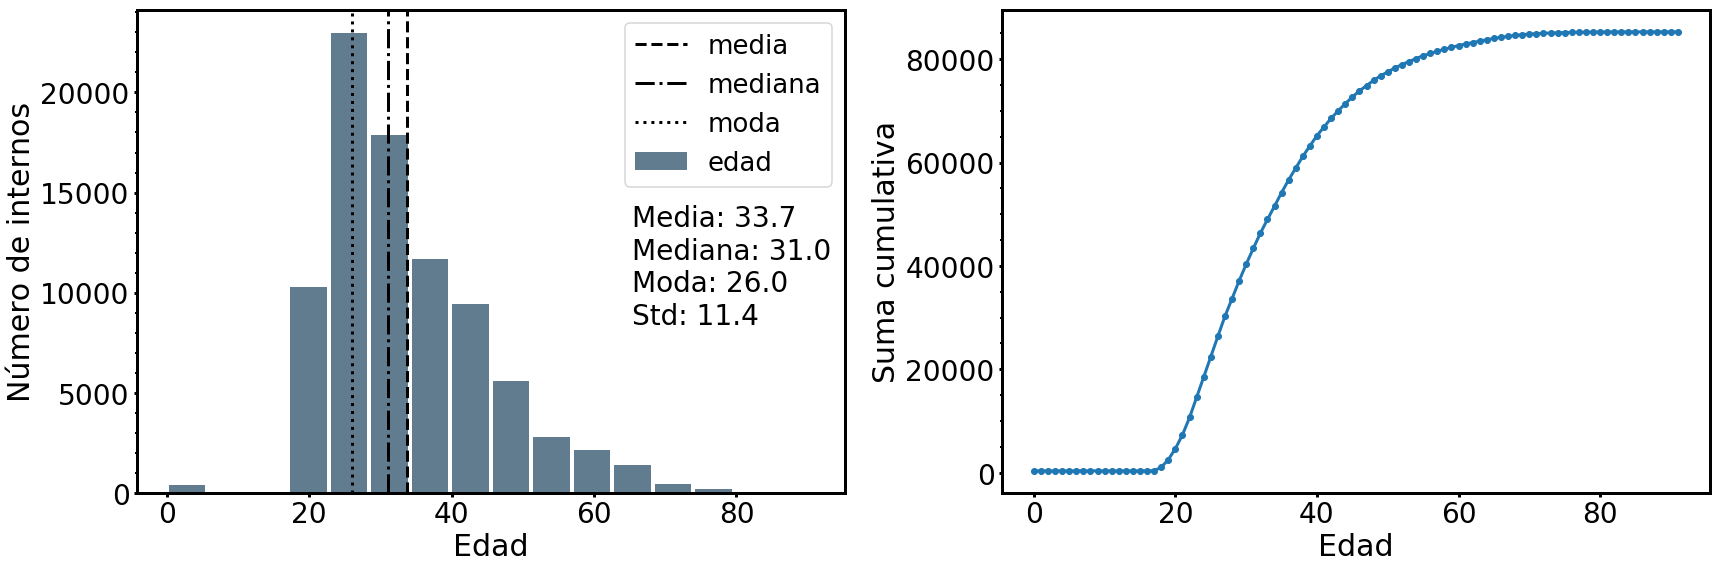

In [75]:
def get_cdf(data):
    cdf = []
    rango = range(min(data), max(data)+1)
    for e in rango:
        cdf.append((data<=e).sum())
    #cdf = np.array(cdf) / len(edades)    
    cdf = np.array(cdf)
    return rango, cdf

#def get_ccdf(data):
#    cdf = []
#    rango = range(min(data), max(data)+1)
#    for e in rango:
#        cdf.append((data>e).sum())
#     #cdf = np.array(cdf) / len(edades)    
#    cdf = np.array(cdf)
#    return rango, cdf

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf



edades = data_raw['edad'].sort_values().dropna().astype('int')
moda = data_raw['edad'].mode().values[0]
media = edades.mean()
mediana = edades.median()
std = edades.std()
print(moda)

# Histograma por edades
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
data_raw["edad"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax)
ax.set_ylabel('Número de internos')
ax.set_xlabel('Edad')
ax.axvline(media, linestyle='--', color='k', label='media')
ax.axvline(mediana, linestyle='-.', color='k', label='mediana')
ax.axvline(moda, linestyle=':', color='k', label='moda')
text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
ax.text(0.7, 0.35, text, transform=ax.transAxes, fontsize=28)
ax.legend(loc='best')
ax = axes[1]
rango_edad, cdf = get_cdf(edades.values)
plt.plot(rango_edad, cdf, '-o')
ax.set_xlabel('Edad')
ax.set_ylabel('Suma cumulativa')

plt.tight_layout()
plt.show()

Observamos que existen registros de edades correspondientes a menores de edad. Veamos qué edad tienen

In [14]:
from collections import Counter
Counter(edades[edades<18])

Counter({0: 369, 16: 8, 17: 11})

La mayoría de los registros presentan edad igual a 0. Esto podría tratarse de niños nacidos dentro de algún establecimiento penitenciario

### Duración de condena

Tenemos dos campos: duracion_condena_anios y duracion_condena_meses. Primero veamos que los valores de duracion_condena_meses estén acotados entre 0 y 11.

In [40]:
np.sort(data_raw['duracion_condena_meses'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

In [ ]:
Los valores de duracion_condena_anios deberían ser enteros no negativos.

In [41]:
np.sort(data_raw['duracion_condena_anios'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       40., 46., 50., nan])

En ambos casos encontramos valores nulos. Veamos cuántos registros tenemos con información faltante.

In [53]:
total = data_raw[['duracion_condena_meses', 'duracion_condena_anios']].shape[0]
ambos_nulos = total - data_raw[['duracion_condena_meses', 'duracion_condena_anios']].dropna(how='all').shape[0]
anios_nulos = total - data_raw[['duracion_condena_anios']].dropna().shape[0]
meses_nulos = total - data_raw[['duracion_condena_meses']].dropna().shape[0]

print('Campo duracion_condena_meses nulo:', meses_nulos)
print('Campo duracion_condena_anios nulo:', anios_nulos)
print('Ambos campos nulos:', ambos_nulos)

Campo duracion_condena_meses nulo: 32
Campo duracion_condena_anios nulo: 1
Ambos campos nulos: 0


Como se trata de pocos registros, podemos descartarlos sin afectar la estadística para hacer el análisis.

Lo próximo sería ver si existen campos con duración de condena de 0 años y 0 meses.

In [68]:
mask = (data_raw['duracion_condena_meses'] == 0) & (data_raw['duracion_condena_anios'] == 0)
count = data_raw[mask].shape[0]
print('Condenas de 0 años y 0 meses:', count)
print('Porcentaje del total: {:.1f}%'.format(100 *count / data_raw.shape[0]))

Condenas de 0 años y 0 meses: 42527
Porcentaje del total: 49.9%


Vemos que la mitad de los registros cae en esta categoría. Dos hipótesis que podemos manejar son que se trate de internos con condena inferior a un mes, o que sea un error de carga (por ejemplo, cargar un 0 en lugar de un NaN). Como no tenemos aún información suficiente como para poner a prueba estas hipótesis, vamos a conservar los registros para el análisis.

In [71]:
data_raw['duracion_condena_anios_total'] = data_raw['duracion_condena_anios'] + data_raw['duracion_condena_meses']/12

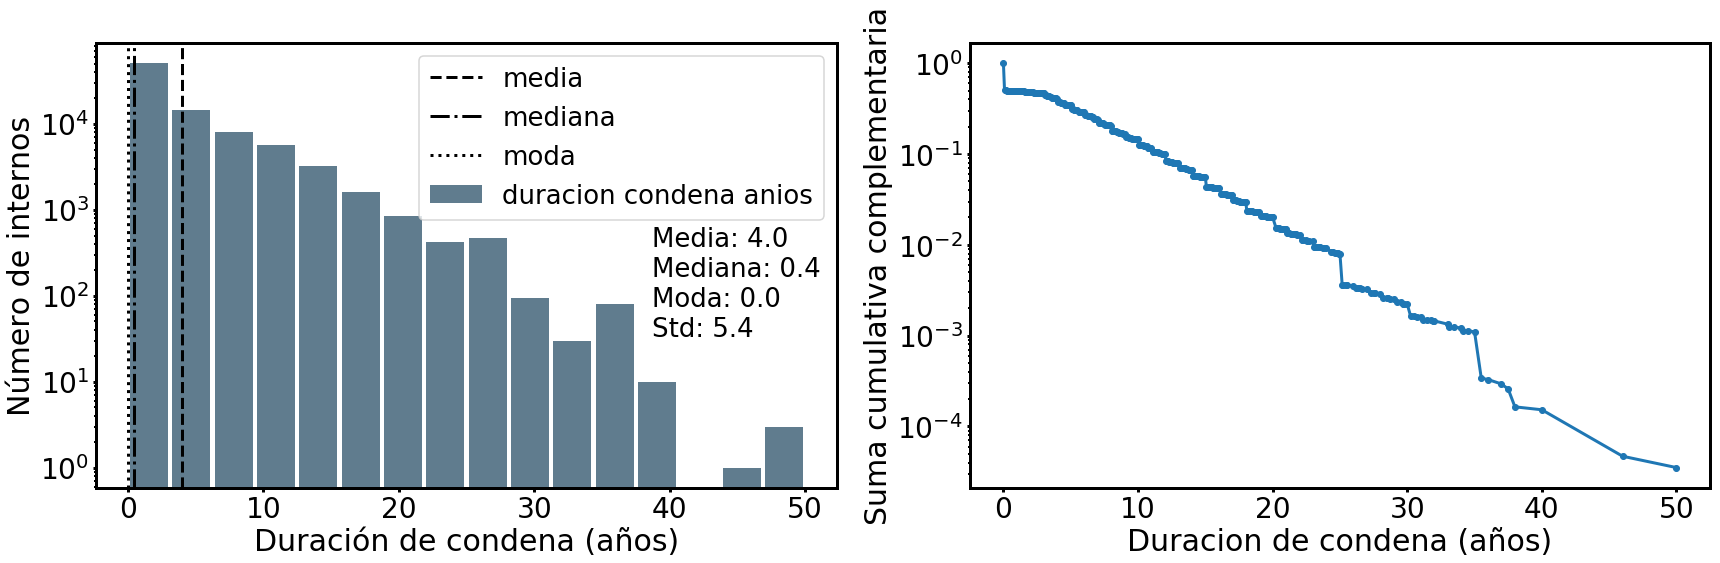

In [81]:
anios = data_raw['duracion_condena_anios_total'].sort_values().dropna()
moda = data_raw['duracion_condena_anios_total'].mode().values[0]
media = anios.mean()
mediana = anios.median()
std = anios.std()

# Histograma por edades
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
data_raw["duracion_condena_anios"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax, label='duracion condena anios')
ax.set_yscale('log')
ax.set_ylabel('Número de internos')
ax.set_xlabel('Duración de condena (años)')
ax.axvline(media, linestyle='--', color='k', label='media')
ax.axvline(mediana, linestyle='-.', color='k', label='mediana')
ax.axvline(moda, linestyle=':', color='k', label='moda')
text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
ax.text(0.75, 0.34, text, transform=ax.transAxes, fontsize=26)
ax.legend(loc='best', fontsize=26)
ax = axes[1]
rango_edad, ccdf = get_ccdf(anios.values)
ax.plot(rango_edad, ccdf, '-o')
ax.set_yscale('log')
ax.set_xlabel('Duracion de condena (años)')
ax.set_ylabel('Suma cumulativa complementaria')

plt.tight_layout()
plt.show()

La duración de condenas parece decaer exponencialmente. (TODO Realizar test)

Obtenemos el parámetro de la distribución exponencial usando MLE.

Referencia: https://www.comp.nus.edu.sg/~limkw/pubs/Lim_MLE_2017.pdf

Para la distribución $p(x) = \lambda e^{-\lambda x}$, el estimador insesgado está dado por 

$$
\hat{\lambda} = \dfrac{N-1}{\sum_{i=1}^N x_i},
$$

y su varianza está dada por 

$$
\mathrm{V}[\hat{\lambda}] = \dfrac{\hat{\lambda}^2}{N-2}.
$$



In [125]:
N = anios.shape[0]
l_est = (N-1) /anios.sum()
l_est
var_l_est = l_est**2 / (N-2)
std_l_est = np.sqrt(var_l_est)
print(l_est, '+-', std_l_est)

l_est_max = l_est + std_l_est
l_est_min = l_est - std_l_est

X = np.linspace(0, 50, 100)
Y = l_est*np.exp(-l_est*X)
Y_max = l_est_max*np.exp(-l_est_max*X)
Y_min = l_est_min*np.exp(-l_est_min*X)

0.2504628598150519 +- 0.0008578300106499625


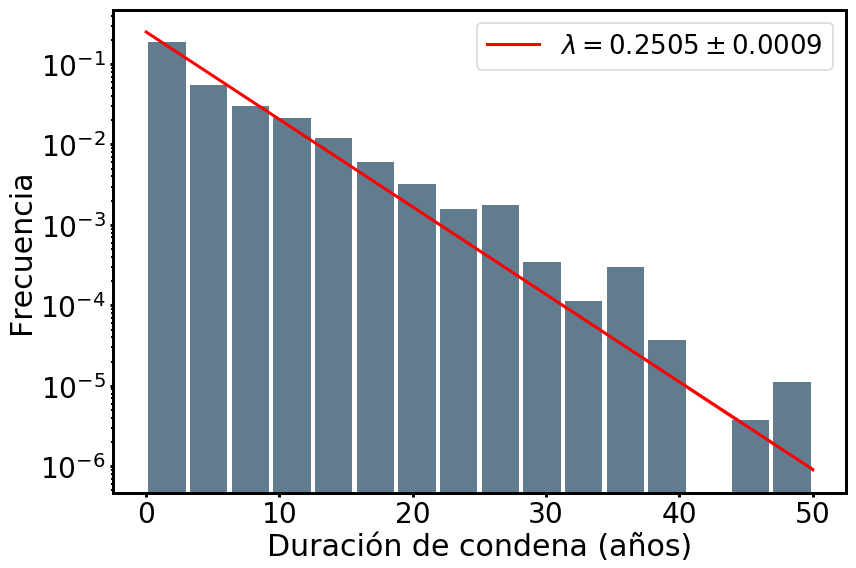

In [126]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=1)
ax = axes
data_raw["duracion_condena_anios"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax, density=True, label='')
ax.set_yscale('log')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Duración de condena (años)')
ax.plot(X, Y, color='red', label=r'$\lambda = {{{:.4f}}}\pm {{{:.4f}}}$'.format(l_est, std_l_est))
ax.fill_between(X, Y_min, Y_max, alpha=0.5, color='red')
ax.legend(loc='best')
plt.tight_layout()
plt.show()